In [50]:
import numpy as np
import os
import time
import random
import torch
from Model import Market_Env


from TD3 import utils
from TD3 import TD3
from TD3 import OurDDPG
from TD3 import DDPG


In [51]:
model_file = r"./models/TD3_1500"
fund_return_src = r'./data/Monthly_Fund_Return_Selected.csv'
feature_src = r'./data/FEATURE.csv'
fund_map_src =r'./data/FUND_MAP_SELECTED.csv'

env =Market_Env(feature_src,fund_map_src,fund_return_src)

# Set seeds
rand_seed =random.randint(0x00000000,0xFFFFFFFF)
env.seed(rand_seed)
torch.manual_seed(rand_seed)
np.random.seed(rand_seed)

state_dim = env.state_dim
action_dim = env.action_dim
max_action = env.max_action
policy_noise =0.2
noise_clip = 0.5
policy_freq =2

kwargs = {
    "state_dim": state_dim,
    "action_dim": action_dim,
    "max_action": max_action,
    "discount": 0.9,
    "tau": 0.005,
}


policy_name="TD3"

if (policy_name=="TD3"):
    kwargs["policy_noise"] = policy_noise * max_action
    kwargs["noise_clip"] = noise_clip * max_action
    kwargs["policy_freq"] = policy_freq
    policy = TD3.TD3(**kwargs)
    policy.load(model_file)
elif(policy_name=="DDPG"):
    policy = OurDDPG.DDPG(**kwargs)
    policy.load(model_file)


In [52]:
state, done = env.reset(validation=True), False
while not done:
    action = policy.select_action(np.array(state))
    action = action+0*np.random.randn(len(action))
    state, reward, done = env.step(action)
    #print(reward)
    time.sleep(.1)
print(env.profilios)
profilios = env.profilios
print (profilios[0])

[[('HK0000055670', 0.16670207098141263), ('LU0125948108', 0.1667582622314527), ('LU0224105477', 0.16656209628642327), ('LU0133711647', 0.16657279292388535), ('LU0345768823', 0.16671238853561773), ('LU0056508442', 0.16669238904120814)], [('HK0000055670', 0.16672889686533734), ('LU0125948108', 0.1665281393917177), ('LU0133711647', 0.16666852948793395), ('LU0345768823', 0.1667222303502743), ('LU0056508442', 0.1666360451579171), ('LU0079474960', 0.16671615874681953)], [('LU0125948108', 0.16663291449013282), ('LU0224105477', 0.16664760966889716), ('LU0133711647', 0.16666455901505361), ('LU0345768823', 0.1667011076492483), ('LU0056508442', 0.16669143838368217), ('LU0079474960', 0.16666237079298593)], [('HK0000055670', 0.1666620696484304), ('LU0125948108', 0.1666624014041598), ('LU0224105477', 0.1667273942095845), ('LU0132282301', 0.1666212919687604), ('LU0056508442', 0.16660669916716925), ('LU0079474960', 0.16672014360189572)], [('HK0000055670', 0.1666286303692409), ('LU0125948108', 0.166612

In [4]:
print (len(profilios[0]))

6


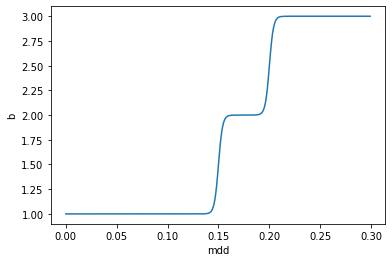

In [41]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,0.3,0.001)   # start,stop,step
y = 1+1/(1+np.exp(-(x-0.15)*500))+1/(1+np.exp(-(x-0.2)*500))

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('mdd')
ax.set_ylabel('b')
ax.plot(x,y)


plt.show()

In [35]:
x=5
1+1/(1+np.exp(-(x-0.15)*500))+1/(1+np.exp(-(x-0.2)*500))

3.0